In [2]:
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from keras.applications.inception_v3 import InceptionV3, decode_predictions
from keras import backend as K

In [10]:
from tensorflow.python.framework.ops import disable_eager_execution 
disable_eager_execution() #Esto fue para solucionar un problema con tf por upgrade de versiones
iv3 = InceptionV3()

In [14]:
print(iv3.summary()) #Con esto se pueden ver las capas de la red neuronal de tf

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                      

 batch_normalization_5 (BatchNo  (None, 35, 35, 64)  192         ['conv2d_5[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_7 (BatchNo  (None, 35, 35, 64)  192         ['conv2d_7[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_10 (BatchN  (None, 35, 35, 96)  288         ['conv2d_10[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_11 (BatchN  (None, 35, 35, 32)  96          ['conv2d_11[0][0]']              
 ormalizat

                                                                                                  
 batch_normalization_22 (BatchN  (None, 35, 35, 64)  192         ['conv2d_22[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_22 (Activation)     (None, 35, 35, 64)   0           ['batch_normalization_22[0][0]'] 
                                                                                                  
 conv2d_20 (Conv2D)             (None, 35, 35, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_23 (Conv2D)             (None, 35, 35, 96)   55296       ['activation_22[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 max_pooling2d_2 (MaxPooling2D)  (None, 17, 17, 288)  0          ['mixed2[0][0]']                 
                                                                                                  
 mixed3 (Concatenate)           (None, 17, 17, 768)  0           ['activation_26[0][0]',          
                                                                  'activation_29[0][0]',          
                                                                  'max_pooling2d_2[0][0]']        
                                                                                                  
 conv2d_34 (Conv2D)             (None, 17, 17, 128)  98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_34 (BatchN  (None, 17, 17, 128)  384        ['conv2d_34[0][0]']              
 ormalizat

                                                                  'activation_39[0][0]']          
                                                                                                  
 conv2d_44 (Conv2D)             (None, 17, 17, 160)  122880      ['mixed4[0][0]']                 
                                                                                                  
 batch_normalization_44 (BatchN  (None, 17, 17, 160)  480        ['conv2d_44[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_44 (Activation)     (None, 17, 17, 160)  0           ['batch_normalization_44[0][0]'] 
                                                                                                  
 conv2d_45 (Conv2D)             (None, 17, 17, 160)  179200      ['activation_44[0][0]']          
          

 ormalization)                                                                                    
                                                                                                  
 activation_54 (Activation)     (None, 17, 17, 160)  0           ['batch_normalization_54[0][0]'] 
                                                                                                  
 conv2d_55 (Conv2D)             (None, 17, 17, 160)  179200      ['activation_54[0][0]']          
                                                                                                  
 batch_normalization_55 (BatchN  (None, 17, 17, 160)  480        ['conv2d_55[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_55 (Activation)     (None, 17, 17, 160)  0           ['batch_normalization_55[0][0]'] 
          

                                                                                                  
 batch_normalization_65 (BatchN  (None, 17, 17, 192)  576        ['conv2d_65[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_65 (Activation)     (None, 17, 17, 192)  0           ['batch_normalization_65[0][0]'] 
                                                                                                  
 conv2d_61 (Conv2D)             (None, 17, 17, 192)  147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_66 (Conv2D)             (None, 17, 17, 192)  258048      ['activation_65[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 conv2d_70 (Conv2D)             (None, 17, 17, 192)  147456      ['mixed7[0][0]']                 
                                                                                                  
 conv2d_74 (Conv2D)             (None, 17, 17, 192)  258048      ['activation_73[0][0]']          
                                                                                                  
 batch_normalization_70 (BatchN  (None, 17, 17, 192)  576        ['conv2d_70[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_74 (BatchN  (None, 17, 17, 192)  576        ['conv2d_74[0][0]']              
 ormalization)                                                                                    
          

 batch_normalization_76 (BatchN  (None, 8, 8, 320)   960         ['conv2d_76[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_78 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_78[0][0]'] 
                                                                                                  
 activation_79 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_79[0][0]'] 
                                                                                                  
 activation_82 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_82[0][0]'] 
                                                                                                  
 activation_83 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_83[0][0]'] 
          

                                                                                                  
 activation_91 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_91[0][0]'] 
                                                                                                  
 activation_92 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_92[0][0]'] 
                                                                                                  
 batch_normalization_93 (BatchN  (None, 8, 8, 192)   576         ['conv2d_93[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_85 (Activation)     (None, 8, 8, 320)    0           ['batch_normalization_85[0][0]'] 
                                                                                                  
 mixed9_1 

In [5]:
from keras.preprocessing import image

In [18]:
x = image.img_to_array(image.load_img("./siberianohacked.png", target_size=(299, 299)))
#Cambio de rango de 0-255 de las matrices a -1 a 1.
x /= 255
x -= 0.5
x *= 2
#Se redimensiona la matriz, agregando un 1 al principio, y así cumplir con las condiciones
#de la funcion de predicción
x = x.reshape([1, x.shape[0], x.shape[1], x.shape[2]])

y = iv3.predict(x) #Resultado de la predicción hecha, pero muestra un vector con las 1000 probabilidade
                    #que son las clases pre-entrenadas de predicción
    
decode_predictions(y) #Con esta función, mapeamos el vector de arriba, pero solo con el nombre 
                    #de la clase, las 5 que tienen mayor probabilidad.

C:\Users\Jeste\anaconda3\lib\site-packages\keras\engine\training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


[[('n07749582', 'lemon', 0.9964457),
  ('n07718472', 'cucumber', 0.00020974233),
  ('n07754684', 'jackfruit', 0.00015653433),
  ('n02109961', 'Eskimo_dog', 0.00014286852),
  ('n07760859', 'custard_apple', 0.00012871376)]]

In [14]:
inp_layer = iv3.layers[0].input #Se selecciona el input de la primera Capa de la red
out_layer = iv3.layers[-1].output #Se toma la salida de la ultima capa(-1 ultimo elemento de un vector)

target_class = 951 #Numero sacado del hoyo - Limon

loss = out_layer[0, target_class] #Funcion de coste, en donde queremos que
                                    #el resultado que proporcione la ultima
                                    #capa, sea el target, que sería el limon.

grad = K.gradients(loss, inp_layer)[0] #El proceso donde calcula, entre el error y el input. 
                                        #Un tensor, cuyo valor dice en cuánto debe variar, para que
                                        #la imagen se vaya "optimizando" o "hackeando"
        
optimize_gradient = K.function([inp_layer, K.learning_phase()], [grad, loss])
#A esta funcion se le entrega el valor que tenemos de entrada, klearningphase es 
#para pasarle la funcion de aprendizaje, y el valor de salida que sería el grad y la funcion de coste.
# Esta funcion K.function, devuelve Numpy arrays.

adv = np.copy(x) # Aqui se copia la imagen de arriba 
pert = 0.01 #Con esto indicamos la perturbación
max_pert = x + 0.01 #Con esto inidicamos la maxima perturbacion
min_pert = x - 0.01 #Viceversa
cost = 0.0
while cost < 0.95:#Mientras el coste sea menos del 95% que siga iterando
    gr, cost = optimize_gradient([adv, 0]) #gr es donde se guarda la gradiente y 
                                        #cost que indica la variable de [grad, loss] en la funcion
                                        #en donde se mete la imagen adv, que es la imagen x, pero copiada 
                                        #y [0] para referirnos al K learning phase.
            
    adv += gr #Se le suma la gradiente a la imagen
    adv = np.clip(adv, min_pert, max_pert) #Con esto limita el array, entre los valores 
                                            #minimos y maximos
    adv = np.clip(adv, -1, 1) #Haciendo que la imagen se perturbe solo dentro de esos parámetros
    print("Target Cost: ", cost) #Cómo el coste irá aumentando, iterando, manipulando los pixeles
                                    #hasta llegar al coste deseado.
    
hacked_img = np.copy(adv) #Para guardar el vector de la imagen obtenida en hacked img.


Target Cost:  8.088884e-05
Target Cost:  8.125961e-05
Target Cost:  8.163014e-05
Target Cost:  8.200341e-05
Target Cost:  8.2377504e-05
Target Cost:  8.275826e-05
Target Cost:  8.314038e-05
Target Cost:  8.352446e-05
Target Cost:  8.3908635e-05
Target Cost:  8.429561e-05
Target Cost:  8.468424e-05
Target Cost:  8.507589e-05
Target Cost:  8.5469655e-05
Target Cost:  8.586672e-05
Target Cost:  8.626919e-05
Target Cost:  8.6671644e-05
Target Cost:  8.707563e-05
Target Cost:  8.7477354e-05
Target Cost:  8.788092e-05
Target Cost:  8.8289016e-05
Target Cost:  8.870244e-05
Target Cost:  8.912152e-05
Target Cost:  8.953949e-05
Target Cost:  8.9956586e-05
Target Cost:  9.036975e-05
Target Cost:  9.078325e-05
Target Cost:  9.119627e-05
Target Cost:  9.161137e-05
Target Cost:  9.202909e-05
Target Cost:  9.245064e-05
Target Cost:  9.287579e-05
Target Cost:  9.329725e-05
Target Cost:  9.3715505e-05
Target Cost:  9.413845e-05
Target Cost:  9.455928e-05
Target Cost:  9.498194e-05
Target Cost:  9.5407

Target Cost:  0.00041464358
Target Cost:  0.0004176825
Target Cost:  0.00042073766
Target Cost:  0.0004238167
Target Cost:  0.00042692467
Target Cost:  0.00043001623
Target Cost:  0.0004331665
Target Cost:  0.00043635556
Target Cost:  0.00043960602
Target Cost:  0.00044286638
Target Cost:  0.00044618585
Target Cost:  0.0004495304
Target Cost:  0.00045289844
Target Cost:  0.00045631296
Target Cost:  0.00045973167
Target Cost:  0.0004631909
Target Cost:  0.00046665932
Target Cost:  0.00047015655
Target Cost:  0.00047368841
Target Cost:  0.00047728798
Target Cost:  0.00048092258
Target Cost:  0.00048463405
Target Cost:  0.0004883635
Target Cost:  0.00049214065
Target Cost:  0.00049600063
Target Cost:  0.00049993
Target Cost:  0.00050391763
Target Cost:  0.00050791947
Target Cost:  0.00051189266
Target Cost:  0.00051589415
Target Cost:  0.0005198874
Target Cost:  0.0005238908
Target Cost:  0.00052790367
Target Cost:  0.000532001
Target Cost:  0.0005361215
Target Cost:  0.0005402596
Target 

Target Cost:  0.087130964
Target Cost:  0.08762207
Target Cost:  0.10150744
Target Cost:  0.1161602
Target Cost:  0.13443698
Target Cost:  0.19396697
Target Cost:  0.16228886
Target Cost:  0.27464798
Target Cost:  0.45564592
Target Cost:  0.21728559
Target Cost:  0.6243597
Target Cost:  0.32942873
Target Cost:  0.49269545
Target Cost:  0.7225721
Target Cost:  0.53620076
Target Cost:  0.3571556
Target Cost:  0.65316224
Target Cost:  0.84758997
Target Cost:  0.9623974


In [21]:
np.clip?

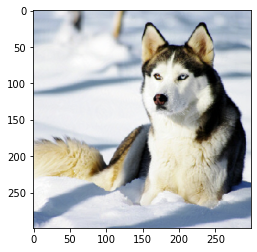

In [16]:
plt.imshow(adv[0].astype(np.uint8)) #Esta es la imagen hackeada, en donde la perturbacion
#está dentro de los limites establecidos. 
plt.show()

In [17]:
from PIL import Image
im = Image.fromarray(adv[0].astype(np.uint8))
im.save("./siberianohacked.png")

In [15]:
adv /= 2 #Aqui tuvimos que dar vuelta la transformación hecha al principio ^^
adv += 0.5
adv *= 255



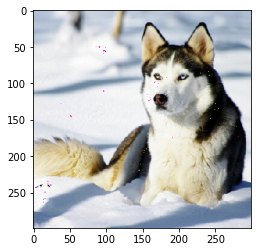

In [13]:
plt.imshow(adv[0].astype(np.uint8)) #Esta imagen es donde se manipulan los pixeles pero sin 
#ponerle rango a la optimización, por lo cual la imagen muestra esos pixeles extralimitados
plt.show()